In [2]:
import math
from sklearn.linear_model import LinearRegression
import numpy as  np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['font.sans-serif'] = ['Times New Roman']
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
best_frame, best_yind = 2, 410


In [4]:
with open('./speed_per_20.npz', 'rb') as f:
    speeds = np.load(f)

In [5]:
speeds.shape

(8, 540, 960, 2)

In [6]:
from utils.flow import calc_frame_flow_index

In [3]:

def calculate_results(u, y, s, r):
    result1 = [round(value / s , 2) for value in u]
    result2 = [round((s * y[i]) / r, 2) for i in range(len(u))]
    return result1, result2

def calcuate_speed_for_line(arr : np.ndarray) -> np.ndarray:
    speed_x = arr[:, 0]
    speed_y = arr[:, 1]
    return np.sqrt(speed_x ** 2 + speed_y ** 2)

In [6]:
best_fit = speeds[best_frame, best_yind]
best_fit_speed_x, best_fit_speed_y = best_fit[:, 0], best_fit[:, 1]

In [7]:
best_fit_speed = np.sqrt(best_fit_speed_x ** 2 + best_fit_speed_y ** 2)
best_fit_speed.shape 

(960,)

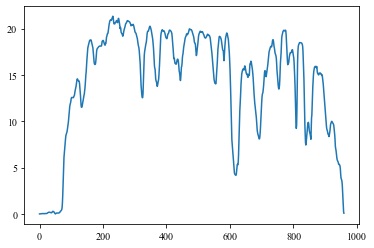

In [12]:
plt.plot(best_fit_speed)

In [5]:


u = np.array("4.658 4.229 3.516".split(" "), dtype=np.float)
y = np.array("0.770 0.720 0.670".split(" "), dtype=np.float)

# 用户输入固定值s和r
s = 0.110623234
r = 0.00000106

# 调用函数并输出结果
result1, result2 = calculate_results(u, y, s, r)

print("u/u*的计算结果：", result1)
print("u*y/r的计算结果：", result2)

# 计算 ln(y) 的值
ln_y = [math.log(i) for i in result2]

# 计算 y 和 x的平均值
y_mean = sum(result2) / len(result2)
x_mean = sum(result1) / len(result1)

# 利用最小二乘法计算 A 和 B 的值
numerator = sum([(ln_y[i] - math.log(y_mean)) * (result1[i] - x_mean) for i in range(len(result2))])
denominator = sum([(ln_y[i] - math.log(y_mean)) ** 2 for i in range(len(result2))])
A = numerator / denominator
B = x_mean - A * math.log(y_mean)

# A*ln(u*y/r)+B 拟合后的新列表
new_x = [round(A * math.log(i) + B, 2) for i in result2]
print("Aln(u*y/r)+B拟合后的计算结果：", new_x)

# 输出 A 和 B的值
print("A =", A)
print("B =", B)

u/u*的计算结果： [42.11, 38.23, 31.78]
u*y/r的计算结果： [80358.39, 75140.31, 69922.23]
Aln(u*y/r)+B拟合后的计算结果： [42.37, 37.37, 32.02]
A = 74.38041812196322
B = -797.7039846095876


In [8]:
lr = LinearRegression()
lr.fit(np.log(result2).reshape(-1, 1), result1)
lr.coef_[0], lr.intercept_

(74.44027409766358, -798.2560412668777)